In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ls


In [3]:
cd drive/MyDrive/formulaai2022

/content/drive/MyDrive/formulaai2022


In [4]:
import numpy as np
import pandas as pd
#!pip install --user pandas-profiling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [5]:
df = pd.read_csv('weather.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df.head()

,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,M_BRAKING_ASSIST,M_SESSION_LINK_IDENTIFIER,M_PIT_RELEASE_ASSIST,TIMESTAMP,M_ZONE_START,M_ZONE_FLAG,M_PIT_STOP_WINDOW_IDEAL_LAP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,GAMEHOST,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_SLI_PRO_NATIVE_SUPPORT,M_SAFETY_CAR_STATUS,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_SEASON_LINK_IDENTIFIER,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES,Unnamed: 58
0,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.088,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
1,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.167,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
2,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.238,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
3,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.298,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
4,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.353,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN


In [7]:
df.describe()

,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,M_BRAKING_ASSIST,M_SESSION_LINK_IDENTIFIER,M_PIT_RELEASE_ASSIST,TIMESTAMP,M_ZONE_START,M_ZONE_FLAG,M_PIT_STOP_WINDOW_IDEAL_LAP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_SLI_PRO_NATIVE_SUPPORT,M_SAFETY_CAR_STATUS,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_SEASON_LINK_IDENTIFIER,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES,Unnamed: 58
count,3572328.0,3572328.0,3.572328e+06,3572328.0,3572328.0,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3572328.0,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,974274.000000,974274.000000,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3572328.0,3572328.0,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,2.598054e+06,2.598054e+06,2.598054e+06,2.598054e+06,2.598054e+06,2.598054e+06,2.598054e+06,2.598054e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,0.0
mean,2021.0,1.0,1.410704e+01,1.0,1.0,8.239394e+18,1.019926e+03,2.857427e+04,9.212292e+00,255.0,6.926777e-01,1.894529e+09,3.153865e-01,1.642326e+09,0.414565,0.009579,1.881843e+00,3.185621e+01,4.890588e+03,1.366560e-02,5.711961e-02,2.407445e+01,1.388980e+01,0.0,0.0,1.588987e+01,3.153865e-01,8.147628e-03,1.894529e+09,3.153865e-01,1.630773e+00,8.246455e+00,2.546247e+02,2.185138e+00,1.894529e+09,3.153865e-01,1.558772e+03,2.471925e+03,2.164424e+00,1.667811e+00,5.917654e+00,9.705187e-02,7.615204e+00,4.123082e-01,5.993771e+00,4.199920e-01,1.147212e+00,3.304962e-01,4.595344e+01,7.583221e+01,2.261691e-01,1.709807e+02,1.580382e-01,1.487266e-03,6.307732e-01,3.153866e-01,1.687091e+01,NaN
std,0.0,0.0,3.091641e-01,0.0,0.0,5.119260e+18,1.682487e+03,5.428773e+04,9.217495e+00,0.0,1.178056e+00,1.345200e+09,4.646697e-01,5.468145e+05,0.315565,0.147761,8.317268e+00,2.457039e+00,6.615081e+02,1.160985e-01,2.320711e-01,2.703748e+00,1.642868e+01,0.0,0.0,1.238743e+01,4.646697e-01,1.561298e-01,1.345200e+09,4.646697e-01,9.293394e-01,3.896537e+00,9.725290e+00,9.589723e+00,1.345200e+09,4.646697e-01,2.070011e+03,2.389139e+03,5.387997e+00,3.339838e+00,1.642600e+01,3.251820e-01,1.331635e+01,7.645373e-01,1.049220e+01,7.746689e-01,3.353760e+00,7.195647e-01,3.811992e+01,8.123138e+00,4.183500e-01,6.422035e+01,3.647768e-01,3.853640e-02,9.293394e-01,4.646697e-01,1.092343e+00,NaN
min,2021.0,1.0,1.400000e+01,1.0,1.0,2.106082e+16,4.000000e-03,0.000000e+00,0.000000e+00,255.0,0.000000e+00,0.000000e+00,0.000000e+00,1.641391e+09,0.000000,0.000000,0.000000e+00,2.300000e+01,3.323000e+03,0.000000e+00,0.000000e+00,1.700000e+01,0.000000e+00,0.0,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+01,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,NaN
25%,2021.0,1.0,1.400000e+01,1.0,1.0,3.591802e+18,

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572328 entries, 0 to 3572327
Data columns (total 59 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   M_PACKET_FORMAT                                 int64  
 1   M_GAME_MAJOR_VERSION                            int64  
 2   M_GAME_MINOR_VERSION                            int64  
 3   M_PACKET_VERSION                                int64  
 4   M_PACKET_ID                                     int64  
 5   M_SESSION_UID                                   float64
 6   M_SESSION_TIME                                  float64
 7   M_FRAME_IDENTIFIER                              int64  
 8   M_PLAYER_CAR_INDEX                              int64  
 9   M_SECONDARY_PLAYER_CAR_INDEX                    int64  
 10  M_BRAKING_ASSIST                                int64  
 11  M_SESSION_LINK_IDENTIFIER                       int64  
 12  M_PIT_RELEASE_ASSIST        

In [9]:
df.columns

Index(['M_PACKET_FORMAT', 'M_GAME_MAJOR_VERSION', 'M_GAME_MINOR_VERSION',
       'M_PACKET_VERSION', 'M_PACKET_ID', 'M_SESSION_UID', 'M_SESSION_TIME',
       'M_FRAME_IDENTIFIER', 'M_PLAYER_CAR_INDEX',
       'M_SECONDARY_PLAYER_CAR_INDEX', 'M_BRAKING_ASSIST',
       'M_SESSION_LINK_IDENTIFIER', 'M_PIT_RELEASE_ASSIST', 'TIMESTAMP',
       'M_ZONE_START', 'M_ZONE_FLAG', 'M_PIT_STOP_WINDOW_IDEAL_LAP',
       'M_TRACK_TEMPERATURE', 'M_TRACK_LENGTH', 'M_GAME_PAUSED',
       'M_FORECAST_ACCURACY', 'GAMEHOST', 'M_AIR_TEMPERATURE',
       'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_SLI_PRO_NATIVE_SUPPORT',
       'M_SAFETY_CAR_STATUS', 'M_TRACK_ID', 'M_ERSASSIST', 'M_FORMULA',
       'M_SEASON_LINK_IDENTIFIER', 'M_PIT_ASSIST', 'M_GEARBOX_ASSIST',
       'M_SESSION_TYPE', 'M_SPECTATOR_CAR_INDEX',
       'M_PIT_STOP_WINDOW_LATEST_LAP', 'M_WEEKEND_LINK_IDENTIFIER',
       'M_DYNAMIC_RACING_LINE_TYPE', 'M_SESSION_TIME_LEFT',
       'M_SESSION_DURATION', 'M_PIT_STOP_REJOIN_POSITION',
       'M_WEATHER_FO

In [10]:
df.head(20)

,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,M_BRAKING_ASSIST,M_SESSION_LINK_IDENTIFIER,M_PIT_RELEASE_ASSIST,TIMESTAMP,M_ZONE_START,M_ZONE_FLAG,M_PIT_STOP_WINDOW_IDEAL_LAP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,GAMEHOST,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_SLI_PRO_NATIVE_SUPPORT,M_SAFETY_CAR_STATUS,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_SEASON_LINK_IDENTIFIER,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES,Unnamed: 58
0,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.088,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
1,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.167,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
2,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.238,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
3,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.298,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
4,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.353,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
5,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.412,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
6,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.450,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
7,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.495,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
8,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.540,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
9,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.620,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

In [12]:
!pip install --user sweetviz

     |████████████████████████████████| 15.1 MB 5.4 MB/s 


The following columns were chosen to drop because they do not impact nor are impacted by weather forecasting:
    
    M_ZONE_START
    
    M_ZONE_FLAG
    
    GAMEHOST
    
    M_PACKET_FORMAT
    
    M_GAME_MAJOR_VERSION
    
    M_GAME_MINOR_VERSION
    
    M_PACKET_VERSION
    
    M_PACKET_ID
    
    M_SESSION_UID
    
    M_PLAYER_CAR_INDEX
    
    M_SECONDARY_PLAYER_CAR_INDEX
    
    M_SESSION_LINK_IDENTIFIER
    
    M_PIT_RELEASE_ASSIST
    
    M_PIT_STOP_WINDOW_IDEAL_LAP
    
    M_SEASON_LINK_IDENTIFIER
    
    M_IS_SPECTATING
    
    M_AI_DIFFICULTY

In [13]:
df.drop(['M_ZONE_START','M_ZONE_FLAG','GAMEHOST','M_PACKET_FORMAT','M_GAME_MAJOR_VERSION','M_GAME_MINOR_VERSION','M_PACKET_VERSION','M_PACKET_ID','M_SESSION_UID','M_PLAYER_CAR_INDEX','M_SECONDARY_PLAYER_CAR_INDEX','M_BRAKING_ASSIST','M_SESSION_LINK_IDENTIFIER','M_PIT_RELEASE_ASSIST','M_PIT_STOP_WINDOW_IDEAL_LAP','M_SEASON_LINK_IDENTIFIER', 'M_IS_SPECTATING', 'M_AI_DIFFICULTY'], inplace=True, axis=1)

In [14]:
df.columns

Index(['M_SESSION_TIME', 'M_FRAME_IDENTIFIER', 'TIMESTAMP',
       'M_TRACK_TEMPERATURE', 'M_TRACK_LENGTH', 'M_GAME_PAUSED',
       'M_FORECAST_ACCURACY', 'M_AIR_TEMPERATURE',
       'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_SLI_PRO_NATIVE_SUPPORT',
       'M_SAFETY_CAR_STATUS', 'M_TRACK_ID', 'M_ERSASSIST', 'M_FORMULA',
       'M_PIT_ASSIST', 'M_GEARBOX_ASSIST', 'M_SESSION_TYPE',
       'M_SPECTATOR_CAR_INDEX', 'M_PIT_STOP_WINDOW_LATEST_LAP',
       'M_WEEKEND_LINK_IDENTIFIER', 'M_DYNAMIC_RACING_LINE_TYPE',
       'M_SESSION_TIME_LEFT', 'M_SESSION_DURATION',
       'M_PIT_STOP_REJOIN_POSITION',
       'M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET',
       'M_WEATHER_FORECAST_SAMPLES_M_WEATHER',
       'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE',
       'M_TRACK_TEMPERATURE_CHANGE',
       'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE',
       'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE', 'M_WEATHER',
       'M_PIT_SPEED_LIMIT', 'M_NETWORK_GAME', 'M_TOTAL_LAPS',
       

In [15]:
df.isna().sum().sort_values(ascending=False)

Unnamed: 58                                       3572328
M_AIR_TEMPERATURE_CHANGE                           974274
M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE          974274
M_TIME_OFFSET                                      974274
M_WEATHER_FORECAST_SAMPLES_M_WEATHER               974274
M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE     974274
M_TRACK_TEMPERATURE_CHANGE                         974274
M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE       974274
M_RAIN_PERCENTAGE                                  974274
M_NETWORK_GAME                                          1
M_TOTAL_LAPS                                            1
M_STEERING_ASSIST                                       1
M_DYNAMIC_RACING_LINE                                   1
M_DRSASSIST                                             1
M_NUM_MARSHAL_ZONES                                     1
M_WEATHER                                               0
M_SESSION_TIME_LEFT                                     0
M_PIT_SPEED_LI

In [16]:
df.drop(["Unnamed: 58","M_SLI_PRO_NATIVE_SUPPORT"], axis = 1, inplace = True)

In [17]:
df


,M_SESSION_TIME,M_FRAME_IDENTIFIER,TIMESTAMP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_SAFETY_CAR_STATUS,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
0,2803.836,82458,1.642362e+09,33,4650,0,0,25,0,0,28,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80,0.0,200.0,0.0,0.0,0.0,16.0
1,2803.836,82458,1.642362e+09,33,4650,0,0,25,0,0,28,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80,0.0,200.0,0.0,0.0,0.0,16.0
2,2803.836,82458,1.642362e+09,33,4650,0,0,25,0,0,28,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80,0.0,200.0,0.0,0.0,0.0,16.0
3,2803.836,82458,1.642362e+09,33,4650,0,0,25,0,0,28,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80,0.0,200.0,0.0,0.0,0.0,16.0
4,2803.836,82458,1.642362e+09,33,4650,0,0,25,0,0,28,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80,0.0,200.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572323,683.047,22874,1.642288e+09,33,4650,0,0,25,10,0,28,0,0,0,1,8,255,0,2756721461,0,396,1080,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,1.0,200.0,0.0,0.0,0.0,16.0
3572324,683.047,22874,1.642288e+09,33,4650,0,0,25,10,0,28,0,0,0,1,8,255,0,2756721461,0,396,1080,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,1.0,200.0,0.0,0.0,0.0,16.0
3572325,683.047,22874,1.642288e+09,33,4650,0,0,25,10,0,28,0,0,0,1,8,255,0,2756721461,0,396,1080,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,1.0,200.0,0.0,0.0,0.0,16.0
3572326,683.047,22874,1.642288e+09,33,4650,0,0,25,10,0,28,0,0,0,1,8,255,0,2756721461,0,396,1080,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,1.0,200.0,0.0,0.0,0.0,16.0


In [18]:
df.drop(['M_SAFETY_CAR_STATUS'], inplace=True, axis=1)

In [19]:
dc = df.columns

In [20]:
len(dc)

38

In [21]:
df.tail(2)

,M_SESSION_TIME,M_FRAME_IDENTIFIER,TIMESTAMP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
3572326,683.047,22874,1.642288e+09,33,4650,0,0,25,10,28,0,0,0,1,8,255,0,2756721461,0,396,1080,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,1.0,200.0,0.0,0.0,0.0,16.0
3572327,683.047,22874,1.642288e+09,33,4650,0,0,25,10,28,0,0,0,1,8,255,0,2756721461,0,396,1080,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# df[['M_NETWORK_GAME','M_TOTAL_LAPS','M_STEERING_ASSIST','M_DYNAMIC_RACING_LINE','M_DRSASSIST','M_NUM_MARSHAL_ZONES']].unique()


In [23]:
df['M_NETWORK_GAME'].replace(np.nan,1.0,inplace = True)
df['M_TOTAL_LAPS'].replace(np.nan,200,inplace = True)
df['M_DYNAMIC_RACING_LINE'].replace(np.nan,0.0,inplace = True)
df['M_DRSASSIST'].replace(np.nan,0.0,inplace = True)
df['M_NUM_MARSHAL_ZONES'].replace(np.nan,16,inplace = True)


In [24]:
df.tail()

,M_SESSION_TIME,M_FRAME_IDENTIFIER,TIMESTAMP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
3572323,683.047,22874,1.642288e+09,33,4650,0,0,25,10,28,0,0,0,1,8,255,0,2756721461,0,396,1080,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,1.0,200.0,0.0,0.0,0.0,16.0
3572324,683.047,22874,1.642288e+09,33,4650,0,0,25,10,28,0,0,0,1,8,255,0,2756721461,0,396,1080,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,1.0,200.0,0.0,0.0,0.0,16.0
3572325,683.047,22874,1.642288e+09,33,4650,0,0,25,10,28,0,0,0,1,8,255,0,2756721461,0,396,1080,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,1.0,200.0,0.0,0.0,0.0,16.0
3572326,683.047,22874,1.642288e+09,33,4650,0,0,25,10,28,0,0,0,1,8,255,0,2756721461,0,396,1080,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,1.0,200.0,0.0,0.0,0.0,16.0
3572327,683.047,22874,1.642288e+09,33,4650,0,0,25,10,28,0,0,0,1,8,255,0,2756721461,0,396,1080,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,1.0,200.0,NaN,0.0,0.0,16.0


In [25]:
df.isnull().sum().sort_values(ascending=False)

M_RAIN_PERCENTAGE                                 974274
M_AIR_TEMPERATURE_CHANGE                          974274
M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE         974274
M_TIME_OFFSET                                     974274
M_WEATHER_FORECAST_SAMPLES_M_WEATHER              974274
M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE    974274
M_TRACK_TEMPERATURE_CHANGE                        974274
M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE      974274
M_STEERING_ASSIST                                      1
M_PIT_STOP_REJOIN_POSITION                             0
M_SESSION_TIME                                         0
M_FRAME_IDENTIFIER                                     0
M_WEATHER                                              0
M_PIT_SPEED_LIMIT                                      0
M_NETWORK_GAME                                         0
M_TOTAL_LAPS                                           0
M_DYNAMIC_RACING_LINE                                  0
M_DRSASSIST                    

In [26]:
df.shape

(3572328, 38)

In [27]:
df.isnull().sum()

M_SESSION_TIME                                         0
M_FRAME_IDENTIFIER                                     0
TIMESTAMP                                              0
M_TRACK_TEMPERATURE                                    0
M_TRACK_LENGTH                                         0
M_GAME_PAUSED                                          0
M_FORECAST_ACCURACY                                    0
M_AIR_TEMPERATURE                                      0
M_NUM_WEATHER_FORECAST_SAMPLES                         0
M_TRACK_ID                                             0
M_ERSASSIST                                            0
M_FORMULA                                              0
M_PIT_ASSIST                                           0
M_GEARBOX_ASSIST                                       0
M_SESSION_TYPE                                         0
M_SPECTATOR_CAR_INDEX                                  0
M_PIT_STOP_WINDOW_LATEST_LAP                           0
M_WEEKEND_LINK_IDENTIFIER      

In [28]:
df.dropna(inplace=True)

In [29]:
df.shape

(2598053, 38)

In [30]:
df.corr()

,M_SESSION_TIME,M_FRAME_IDENTIFIER,TIMESTAMP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
M_SESSION_TIME,1.000000,0.974000,-0.066116,0.208476,-0.062604,-0.015465,-0.060520,0.218790,0.121016,-0.041713,0.056545,-0.030308,0.056545,0.056545,0.006527,0.007668,-0.087004,-0.162111,0.056545,-0.166014,-0.130650,-0.183653,0.001655,0.066255,0.069415,0.077461,0.073772,0.087747,0.066543,0.050886,-0.007734,0.076472,-0.145707,0.197510,0.223013,0.056545,0.056545,-0.079008
M_FRAME_IDENTIFIER,0.974000,1.000000,-0.016331,0.146138,-0.111196,-0.005979,-0.073432,0.139616,-0.028684,0.057100,-0.059691,-0.026689,-0.059691,-0.059691,0.140657,0.006560,-0.079255,-0.238041,-0.059691,-0.195312,-0.175392,-0.162991,-0.055223,-0.004764,0.008158,-0.021968,-0.019666,-0.016391,-0.024572,-0.006011,-0.037441,0.068694,-0.104299,0.175239,0.074382,-0.059691,-0.059691,-0.103656
TIMESTAMP,-0.066116,-0.016331,1.000000,-0.065161,-0.759139,-0.005505,-0.110293,-0.074532,-0.417125,0.192695,-0.667307,-0.087701,-0.667307,-0.667307,0.442179,0.031829,-0.249760,-0.533734,-0.667307,-0.522138,-0.625694,-0.351301,-0.192853,-0.210086,-0.159758,-0.272941,-0.257444,-0.279056,-0.257990,-0.164248,-0.118416,-0.234036,-0.074759,0.442366,-0.440873,-0.667307,-0.667307,0.267630
M_TRACK_TEMPERATURE,0.208476,0.146138,-0.065161,1.000000,-0.128431,-0.053409,0.173434,0.943233,0.522966,0.331845,0.091847,0.024293,0.091847,0.091847,-0.488691,-0.017966,-0.288777,0.186020,0.091847,0.002165,-0.143704,-0.251322,0.189166,0.225041,0.133872,0.362106,0.330029,0.384990,0.327975,0.121007,-0.614052,0.540662,-0.265294,0.353776,0.391696,0.091847,0.091847,-0.363193
M_TRACK_LENGTH,-0.062604,-0.111196,-0.759139,-0.128431,1.000000,0.003810,0.183286,-0.032335,0.455049,-0.348931,0.640058,0.001531,0.640058,0.640058,-0.501041,-0.016857,0.247578,0.470740,0.640058,0.419794,0.542301,0.233594,0.221073,0.225363,0.199286,0.297069,0.278023,0.301609,0.278382,0.189765,0.389966,0.169950,0.056263,-0.333390,0.328068,0.640058,0.640058,0.056632
M_GAME_PAUSED,-0.015465,-0.005979,-0.005505,-0.053409,0.003810,1.000000,-0.028971,-0.064972,-0.028378,0.033240,-0.079892,-0.006143,-0.079892,-0.079892,-0.006016,0.004543,-0.024053,0.088827,-0.079892,-0.056217,-0.061443,-0.046457,0.000022,-0.019417,0.003184,-0.018791,-0.015067,-0.021948,-0.015854,0.009488,0.050949,0.060393,0.217726,0.045831,-0.050996,-0.079892,-0.079892,0.013230
M_FORECAST_ACCURACY,-0.060520,-0.073432,-0.110293,0.173434,0.183286,-0.028971,1.000000,0.247291,0.325126,-0.219568,0.362631,0.212022,0.362631,0.362631,-0.298577,0.009499,-0.026776,0.258798,0.362631,0.281964,0.193776,0.100141,0.123047,0.154210,0.158518,0.219960,0.193534,0.231743,0.200658,0.110740,-0.062450,0.096327,-0.105089,-0.068311,-0.106635,0.362631,0.362631,0.039289
M_AIR_TEMPERATURE,0.218790,0.139616,-0.074532,0.943233,-0.032335,-0.064972,0.247291,1.000000,0.601616,0.211614,0.221417,0.017864,0.221417,0.221417,-0.542420,-0.019795,-0.278690,0.206842,0.221417,0.031775,-0.105799,-0.248828,0.214902,0.266113,0.174635,0.413513,0.375345,0.439814,0.373476,0.152132,-0.379741,0.522418,-0.329906,0.352684,0.453665,0.221417,0.221417,-0.352327
M_NUM_WEATHER_FORECAST_SAMPLES,0.121016,-0.028684,-0.417125,0.522966,0.455049,-0.028378,0.325126,0.601616,1.000000,-0.435977,0.671623,-0.034591,0.671623,0.671623,-0.958544,0.017652,-0.073449,0.599320

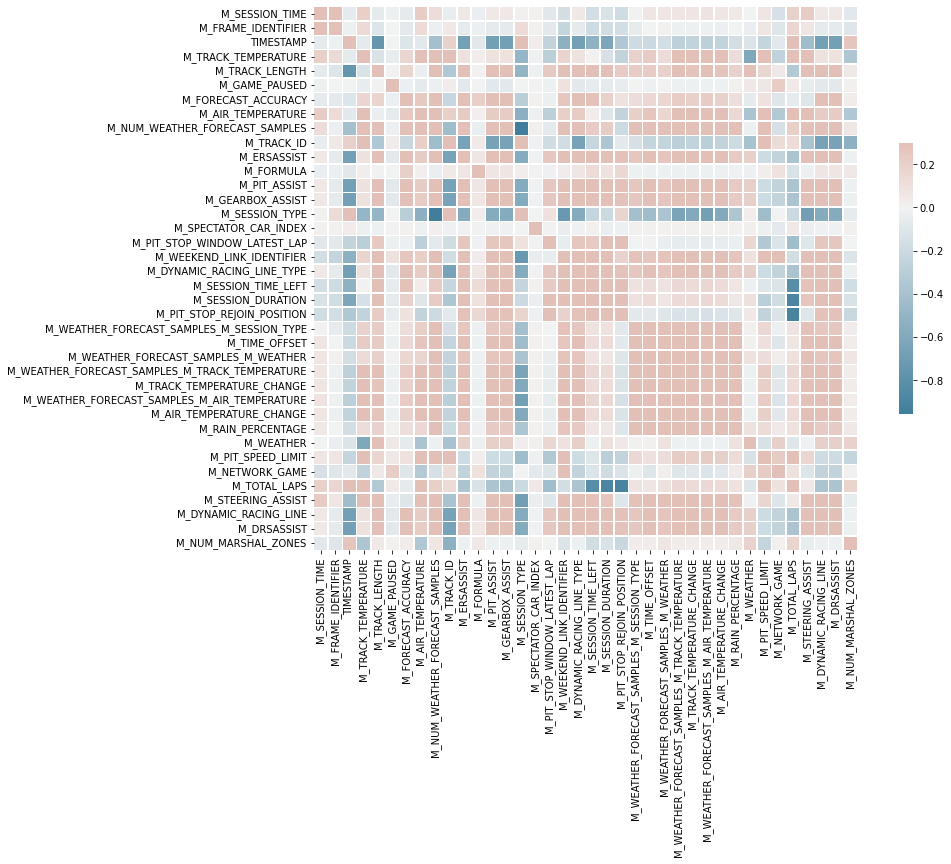

In [31]:
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



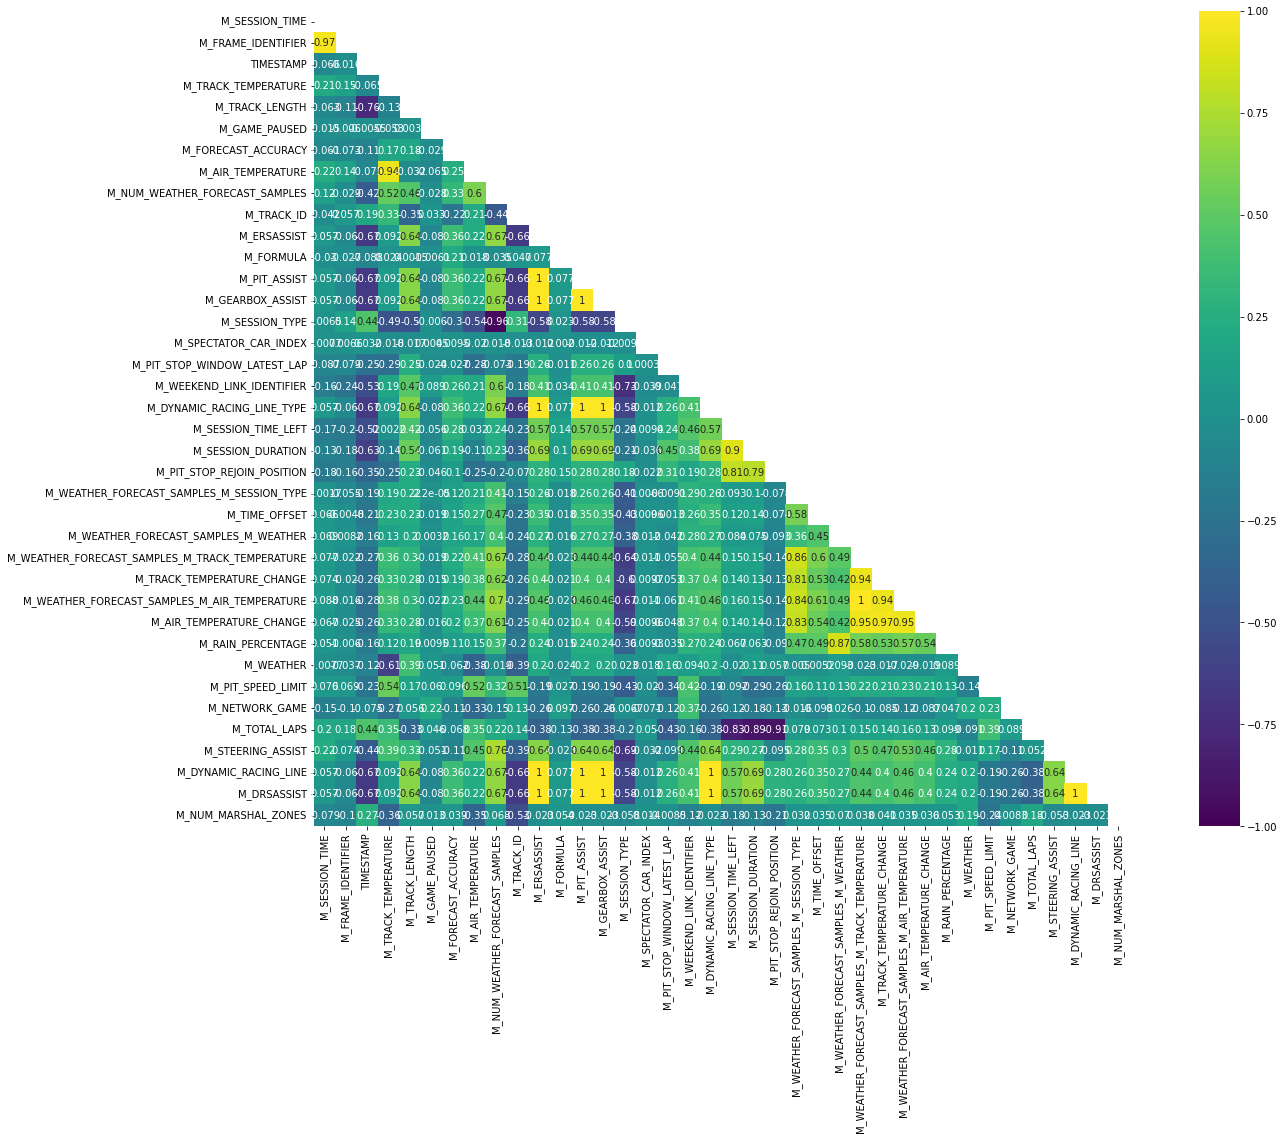

In [32]:
#visual of correlation between fields or columns
plt.figure(figsize=(25, 15))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask = mask, square = True, cmap = 'viridis', annot = True, vmin=-1, vmax=1);


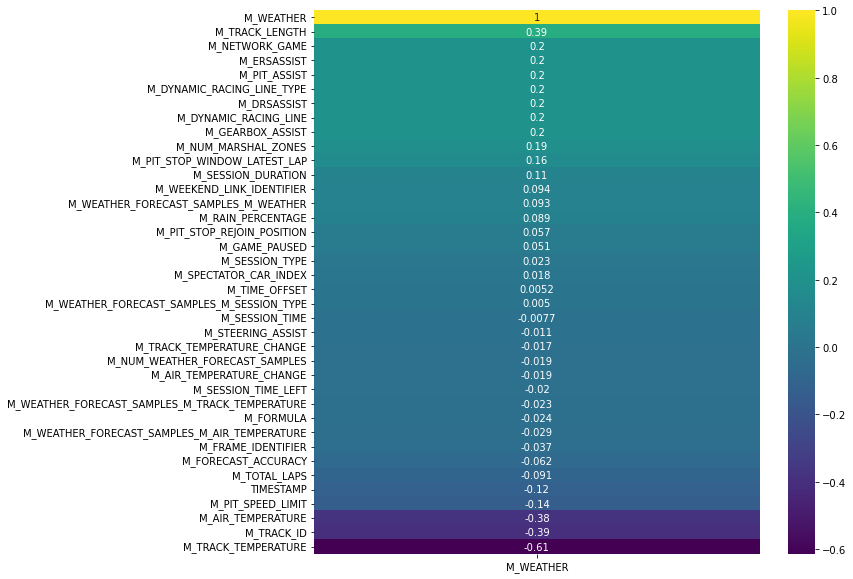

In [33]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,10))

sns.heatmap(df.corr()[['M_WEATHER']].sort_values('M_WEATHER', ascending=False), annot=True, cmap='viridis');



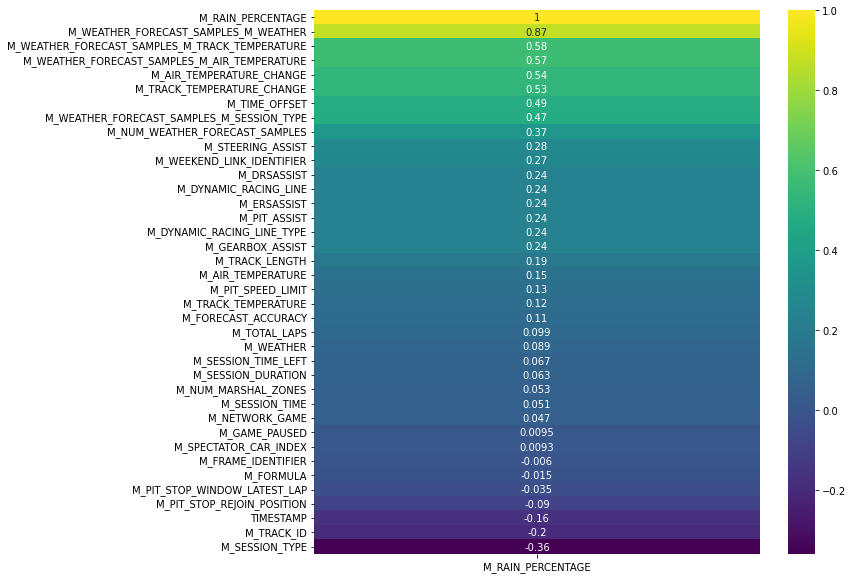

In [34]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,10))

sns.heatmap(df.corr()[['M_RAIN_PERCENTAGE']].sort_values('M_RAIN_PERCENTAGE', ascending=False), annot=True, cmap='viridis');

In [35]:
from datetime import datetime

In [36]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], unit='s').dt.strftime('%Y-%m-%d %H:%M')
df.head()

,M_SESSION_TIME,M_FRAME_IDENTIFIER,TIMESTAMP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
21,2803.836,82458,2022-01-16 19:32,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0
22,2803.836,82458,2022-01-16 19:32,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0
23,2803.836,82458,2022-01-16 19:32,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0
24,2803.836,82458,2022-01-16 19:32,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0
25,2803.836,82458,2022-01-16 19:32,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0


In [37]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

In [38]:
df.dtypes

M_SESSION_TIME                                           float64
M_FRAME_IDENTIFIER                                         int64
TIMESTAMP                                         datetime64[ns]
M_TRACK_TEMPERATURE                                        int64
M_TRACK_LENGTH                                             int64
M_GAME_PAUSED                                              int64
M_FORECAST_ACCURACY                                        int64
M_AIR_TEMPERATURE                                          int64
M_NUM_WEATHER_FORECAST_SAMPLES                             int64
M_TRACK_ID                                                 int64
M_ERSASSIST                                                int64
M_FORMULA                                                  int64
M_PIT_ASSIST                                               int64
M_GEARBOX_ASSIST                                           int64
M_SESSION_TYPE                                             int64
M_SPECTATOR_CAR_INDEX    

In [39]:
df.set_index("TIMESTAMP",inplace = True)

In [40]:
df.head(100)

,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-16 19:32:00,2803.836,82458,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0
2022-01-16 19:32:00,2803.836,82458,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0
2022-01-16 19:32:00,2803.836,82458,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0
2022-01-16 19:32:00,2803.836,82458,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0
2022-01-16 19:32:00,2803.836,82458,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-16 19:35:00,2986.005,88545,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0
2022-01-16 19:35:00,2986.005,88545,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0
2022-01-16 19:35:00,2986.005,88545,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0


In [41]:
df['M_WEATHER'].unique()

array([0, 5, 1, 2])

In [42]:
df["M_RAIN_PERCENTAGE"].unique()

array([ 0.,  1.,  2.,  5.,  7., 17.,  6.,  4.,  3.,  8., 19., 11., 10.,
        9., 24., 21., 15., 73., 18., 16., 14., 12., 37., 76., 90., 92.,
       13., 20., 79., 93., 56., 55.])

In [43]:
df.columns

Index(['M_SESSION_TIME', 'M_FRAME_IDENTIFIER', 'M_TRACK_TEMPERATURE',
       'M_TRACK_LENGTH', 'M_GAME_PAUSED', 'M_FORECAST_ACCURACY',
       'M_AIR_TEMPERATURE', 'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_TRACK_ID',
       'M_ERSASSIST', 'M_FORMULA', 'M_PIT_ASSIST', 'M_GEARBOX_ASSIST',
       'M_SESSION_TYPE', 'M_SPECTATOR_CAR_INDEX',
       'M_PIT_STOP_WINDOW_LATEST_LAP', 'M_WEEKEND_LINK_IDENTIFIER',
       'M_DYNAMIC_RACING_LINE_TYPE', 'M_SESSION_TIME_LEFT',
       'M_SESSION_DURATION', 'M_PIT_STOP_REJOIN_POSITION',
       'M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET',
       'M_WEATHER_FORECAST_SAMPLES_M_WEATHER',
       'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE',
       'M_TRACK_TEMPERATURE_CHANGE',
       'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE',
       'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE', 'M_WEATHER',
       'M_PIT_SPEED_LIMIT', 'M_NETWORK_GAME', 'M_TOTAL_LAPS',
       'M_STEERING_ASSIST', 'M_DYNAMIC_RACING_LINE', 'M_DRSASSIST',
       'M_NUM_MAR

In [44]:
df2 = df.drop(['M_SESSION_TIME', 'M_FRAME_IDENTIFIER','M_GAME_PAUSED', 'M_FORECAST_ACCURACY',
       'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_FORMULA',
       'M_SESSION_TYPE', 'M_SPECTATOR_CAR_INDEX',
       'M_WEEKEND_LINK_IDENTIFIER',
       'M_SESSION_TIME_LEFT',
       'M_PIT_STOP_REJOIN_POSITION',
       'M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET',
       'M_WEATHER_FORECAST_SAMPLES_M_WEATHER',
       'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE',
       'M_TRACK_TEMPERATURE_CHANGE',
       'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE',
       'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE', 'M_TOTAL_LAPS',
       'M_STEERING_ASSIST'], axis= 1)

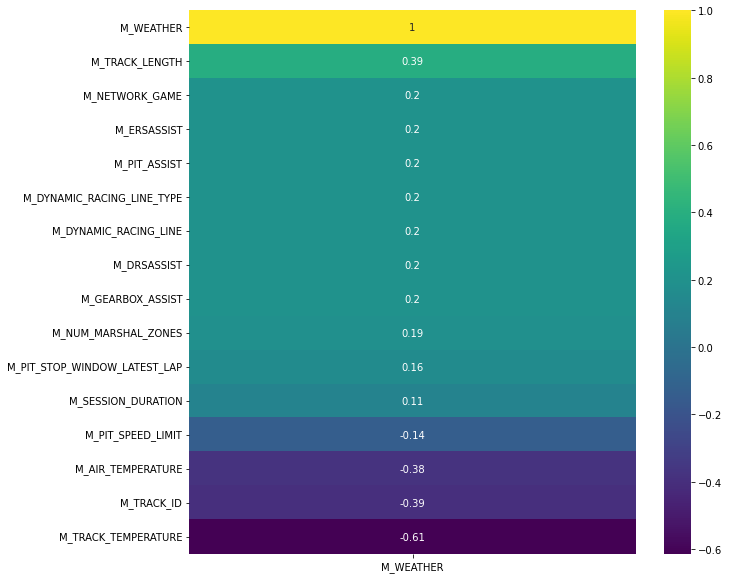

In [45]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,10))

sns.heatmap(df2.corr()[['M_WEATHER']].sort_values('M_WEATHER', ascending=False), annot=True, cmap='viridis');

In [46]:
df.head()

,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-16 19:32:00,2803.836,82458,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0
2022-01-16 19:32:00,2803.836,82458,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0
2022-01-16 19:32:00,2803.836,82458,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0
2022-01-16 19:32:00,2803.836,82458,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0
2022-01-16 19:32:00,2803.836,82458,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80,0.0,200.0,0.0,0.0,0.0,16.0


In [47]:
features = [col for col in df.columns if not col == 'M_WEATHER']
X = df[features]
y = df[['M_WEATHER']].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
X_train.head()

,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-16 19:32:00,2803.836,82458,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80,0.0,200.0,0.0,0.0,0.0,16.0
2022-01-16 19:32:00,2803.836,82458,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80,0.0,200.0,0.0,0.0,0.0,16.0
2022-01-16 19:32:00,2803.836,82458,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80,0.0,200.0,0.0,0.0,0.0,16.0
2022-01-16 19:32:00,2803.836,82458,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80,0.0,200.0,0.0,0.0,0.0,16.0
2022-01-16 19:32:00,2803.836,82458,33,4650,0,0,25,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80,0.0,200.0,0.0,0.0,0.0,16.0


In [49]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [50]:
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length=3, batch_size=128)
batch_x, batch_y = train_sequences[0]

In [51]:
batch_x.shape

(128, 3, 36)

In [52]:
batch_y.shape

(128, 1)

In [53]:
batch_x[0]

array([[ 0.95289397,  0.91561814,  0.46316795, -0.42953425, -0.07698383,
        -0.28712032,  0.31023282, -0.8442036 ,  1.02540467, -0.76502078,
        -0.06028545, -0.76502078, -0.76502078,  1.17060868,  0.03033991,
        -0.26113874, -1.33397234, -0.76502078, -0.80344564, -0.85170298,
        -0.45022579, -0.50967163, -0.37114364, -0.31226523, -0.59039095,
        -0.55404821, -0.58991283, -0.55752955, -0.34113902,  0.54250224,
        -0.40119044,  0.51128567, -0.4523296 , -0.76502078, -0.76502078,
        -0.95931972],
       [ 0.95289397,  0.91561814,  0.46316795, -0.42953425, -0.07698383,
        -0.28712032,  0.31023282, -0.8442036 ,  1.02540467, -0.76502078,
        -0.06028545, -0.76502078, -0.76502078,  1.17060868,  0.03033991,
        -0.26113874, -1.33397234, -0.76502078, -0.80344564, -0.85170298,
        -0.45022579, -0.50967163, -0.37114364, -0.31226523, -0.59039095,
        -0.55404821, -0.58991283, -0.55752955, -0.34113902,  0.54250224,
        -0.40119044,  0.51128

In [54]:
pd.DataFrame(X_train_sc, columns=X_train.columns).head(3)

,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
0,0.952894,0.915618,0.463168,-0.429534,-0.076984,-0.28712,0.310233,-0.844204,1.025405,-0.765021,-0.060285,-0.765021,-0.765021,1.170609,0.03034,-0.261139,-1.333972,-0.765021,-0.803446,-0.851703,-0.450226,-0.509672,-0.371144,-0.312265,-0.590391,-0.554048,-0.589913,-0.55753,-0.341139,0.542502,-0.40119,0.511286,-0.45233,-0.765021,-0.765021,-0.95932
1,0.952894,0.915618,0.463168,-0.429534,-0.076984,-0.28712,0.310233,-0.844204,1.025405,-0.765021,-0.060285,-0.765021,-0.765021,1.170609,0.03034,-0.261139,-1.333972,-0.765021,-0.803446,-0.851703,-0.450226,-0.509672,-0.371144,-0.312265,-0.590391,-0.554048,-0.589913,-0.55753,-0.341139,0.542502,-0.40119,0.511286,-0.45233,-0.765021,-0.765021,-0.95932
2,0.952894,0.915618,0.463168,-0.429534,-0.076984,-0.28712,0.310233,-0.844204,1.025405,-0.765021,-0.060285,-0.765021,-0.765021,1.170609,0.03034,-0.261139,-1.333972,-0.765021,-0.803446,-0.851703,-0.450226,-0.509672,-0.371144,-0.312265,-0.590391,-0.554048,-0.589913,-0.55753,-0.341139,0.542502,-0.40119,0.511286,-0.45233,-0.765021,-0.765021,-0.95932


In [55]:
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=3, batch_size=128)

In [56]:
train_sequences[0][0].shape

(128, 3, 36)

In [57]:
input_shape = train_sequences[0][0][0].shape

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model2 = Sequential()
model2.add(GRU(8, input_shape=(3, 36), return_sequences=True)) # True if next layer is RNN
model2.add(GRU(8, return_sequences=False)) # False if next layer is Dense

model2.add(Dense(4, activation='relu'))

model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='bce', metrics=['acc'])

es = EarlyStopping(patience = 2)

history2 = model2.fit(train_sequences, validation_data=test_sequences, epochs=100, batch_size = 128, callbacks = [es])

Epoch 1/100
 6092/15223 [===========>..................] - ETA: 1:20 - loss: -1.0493 - acc: 0.9329

In [ ]:
plt.plot(history2.history['acc'], label='accuracy')
plt.plot(history2.history['val_acc'], label='validation accuracy')
plt.legend();

In [ ]:
plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Test loss')
plt.legend();